# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 10

## Problem 1a-e

I went to the website: http://earthref.org/doi/10.1002/2016GC006307
and downloaded the data file.  I put that into something called _ProjectDirectory_ in my class folder.   

Now I need to unpack it with **download_magic.py** as usual.  

In [1]:
!download_magic.py -WD Problem_1 -f magic_contribution_12848.txt

Using default arguments for: -F, -A, -ID, -Fsa, -Fsi, -O, -sep
working on:  'contribution'
1  records written to file  ProjectDirectory/contribution.txt
contribution  data put in  ProjectDirectory/contribution.txt
working on:  'locations'
8  records written to file  ProjectDirectory/locations.txt
locations  data put in  ProjectDirectory/locations.txt
working on:  'sites'
23  records written to file  ProjectDirectory/sites.txt
sites  data put in  ProjectDirectory/sites.txt
working on:  'samples'
106  records written to file  ProjectDirectory/samples.txt
samples  data put in  ProjectDirectory/samples.txt
working on:  'specimens'
377  records written to file  ProjectDirectory/specimens.txt
specimens  data put in  ProjectDirectory/specimens.txt
working on:  'measurements'
14124  records written to file  ProjectDirectory/measurements.txt
measurements  data put in  ProjectDirectory/measurements.txt
working on:  'ages'
23  records written to file  ProjectDirectory/ages.txt
ages  data put in  

I used Thellier GUI and
- set the criteria to CCRIT specimen level criteria
- ran the auto interpreter to find all the specimen

Now I want to copy the interpreter files to my working directory.  This should only be done once, so I've commented out the line, which I would UNcomment after re-running the autointerpreter.  

In [49]:
#!mv Problem_1/criteria.txt ccrit_criteria.txt
#!mv Problem_1/thellier_interpreter/thellier_interpreter_STDEV-OPT_specimens.txt ccrit_thellier_interpreter.txt


I set the criteria to the TTA set of selection criteria and repeated the auto interpreter run.  Now I will repeat the copying procedure for the new set of interpretations.  

In [48]:
#!mv Problem_1/criteria.txt tta_criteria.txt
#!mv Problem_1/thellier_interpreter/thellier_interpreter_STDEV-OPT_specimens.txt tta_thellier_interpreter.txt

Now we read in the two interpreter files into Pandas DataFrames.  For this I have to import the Pandas module and know what format the file is in.  So first, I'll take a peek at the datafile to see what's what.  

In [50]:
!head ccrit_thellier_interpreter.txt

tab	pmag_specimens
er_sample_name	er_specimen_name	specimen_int_uT	measurement_step_min	measurement_step_min	specimen_lab_field_dc	Anisotropy_correction_factor	NLT_correction_factor	Cooling_rate_correction_factor	specimen_int_n	specimen_frac	specimen_b_beta	specimen_k_prime	specimen_int_mad	specimen_int_dang	specimen_scat
1991-1992 Eruption Site	AL2360-1e	33.63	100	500	25	1.00	-	-	15.00	0.89	0.02	-0.00	4.15	2.80	Pass
1991-1992 Eruption Site	AL2742-4a	29.12	150	475	25	1.00	-	-	13.00	0.85	0.04	0.13	4.73	2.08	Pass
1991-1992 Eruption Site	AL2742-4e	35.38	100	475	25	1.00	-	-	14.00	0.91	0.01	0.04	2.68	2.17	Pass
1991-1992 Eruption Site	AL2852-2b	37.65	200	500	25	1.00	-	-	13.00	0.87	0.03	0.16	2.55	0.80	Pass
1991-1992 Eruption Site	AL2852-2d	37.15	0	450	25	1.00	-	-	14.00	0.81	0.02	-0.04	4.67	2.34	Pass
1991-1992 Eruption Site	AL2852-2f	37.66	225	500	25	1.00	-	-	12.00	0.81	0.02	-0.00	1.98	1.54	Pass
1991-1992 Eruption Site	AL3028-2a	35.09	100	475	25	1.00	-	-	16.00	0.79	0.02	-0.01	3.71	2.69	Pass
19

Ah. So it is tab delimited and the header is in the second line, so header=1 (because we start from 0).  

In [51]:
import pandas as pd

In [53]:
ccrit=pd.read_csv('ccrit_thellier_interpreter.txt',sep='\t',header =1)
tta=pd.read_csv('tta_thellier_interpreter.txt',sep='\t',header =1)

Now for the painful part.  We need to do the following: 
- create a column named 'specimen' which as the same value as the 'er_specimen_name' column in both  interpreter DataFrames.
- read in the specimens.txt file and tie the sample name to the specimen using **pd.merge()**. 
- read in the samples.txt file and tie the site name to the sample name using **pd.merge()**. 
- read in the PmagPy_2016.csv file and tie the expected field value to the site using **pd.merge()**.  

In [54]:
ccrit['specimen']=ccrit['er_specimen_name'] # do the specimen name
tta['specimen']=tta['er_specimen_name']


Figure out the file formats for the specimen, sample and PmagPy_2016 files and read them in:

In [55]:
!head Problem_1/specimens.txt


tab	specimens
specimen	sample	experiments	geologic_classes	geologic_types	lithologies	meas_step_max	meas_step_min	meas_step_unit	software_packages	int_abs	int_corr	int_corr_aniso	int_corr_cooling_rate	int_corr_nlt	int_n_measurements	int_treat_dc_field	int_b_beta	int_f	int_frac	int_g	int_gmax	int_k	int_k_prime	int_scat	int_alpha	int_dang	int_mad_anc	int_mad_free	int_dck	int_dpal	int_drats	int_n_ptrm	int_dtr	citations	method_codes	result_quality	result_type
A-1-3	A					813	273	K	pmagpy-3.17.1: thellier_gui.pmagpy-3.17.1	4.16e-05	u	1.00			10	3.00e-05	0.04	0.84	0.82	0.86	0.21	0.29	-0.00	1	1.23	1.41	0.64	1.23	5.86	7.74	6.73	4	nan	This study	LP-PI-TRM:LP-PI-ZI:LP-PI-ALT-PTRM:IE-TT	g	i
A-2-3	A					873	273	K	pmagpy-3.17.1: thellier_gui.pmagpy-3.17.1	3.81e-05	u	1.00			13	3.00e-05	0.02	0.98	0.98	0.83	0.26	0.14	0.14	1	0.41	0.51	0.43	0.83	9.46	11.01	7.21	6	nan	This study	LP-PI-TRM:LP-PI-ZI:LP-PI-ALT-PTRM:IE-TT	g	i
A-3-3	A					833	273	K	pmagpy-3.17.1: thellier_gui.pmagpy-3.17.1	3.72e-05	u	1.00			11

In [56]:
specimens=pd.read_csv('Problem_1/specimens.txt',sep='\t',header=1)

In [57]:
!head Problem_1/samples.txt


tab	samples
sample	site	lat	lon	cooling_rate	geologic_classes	geologic_types	lithologies	int_abs	citations
A	Hawaii 1960 Flow	19.52	204.19		Extrusive:Igneous	Lava Flow	Basalt		10.1111/j.1365-246X.2012.05412.x:This study
AL2360-1	1991-1992 Eruption Site	9.8	255.7		Extrusive:Igneous:Submarine	Glassy Margin	Submarine Basaltic Glass		10.1029/2005GC001141:This study
AL2742-4	1991-1992 Eruption Site	9.8	255.7		Extrusive:Igneous:Submarine	Glassy Margin	Submarine Basaltic Glass		10.1029/2005GC001141:This study
AL2770-3	1991-1992 Eruption Site	9.8	255.7		Extrusive:Igneous:Submarine	Glassy Margin	Submarine Basaltic Glass		10.1029/2005GC001141:This study
AL2844-2	1991-1992 Eruption Site	9.8	255.7		Extrusive:Igneous:Submarine	Glassy Margin	Submarine Basaltic Glass		10.1029/2005GC001141:This study
AL2852-2	1991-1992 Eruption Site	9.8	255.7		Extrusive:Igneous:Submarine	Glassy Margin	Submarine Basaltic Glass		10.1029/2005GC001141:This study
AL3023-1	1991-1992 Eruption Site	9.8	255.7		Extrusive:Igneou

In [58]:
samples=pd.read_csv('Problem_1/samples.txt',sep='\t',header=1)

In [59]:
!head PmagPy_2016.txt

In [60]:
fields=pd.read_csv('PmagPy_2016.txt',sep='\t',header=0)

And merge them together. 

In [61]:
specimen_info=pd.merge(specimens,samples,on='sample')
specimen_info=pd.merge(specimen_info,fields,on='site')
specimen_info=specimen_info[['specimen','sample','site','B_exp']]
specimen_info.head()

specimen sample              site  B_exp
0    A-1-3      A  Hawaii 1960 Flow   36.0
1    A-2-3      A  Hawaii 1960 Flow   36.0
2    A-3-3      A  Hawaii 1960 Flow   36.0
3    A-5-3      A  Hawaii 1960 Flow   36.0
4    B-6-3      B  Hawaii 1960 Flow   36.0

In [62]:
ccrit_merged=pd.merge(ccrit,specimen_info,on='specimen')
tta_merged=pd.merge(tta,specimen_info,on='specimen')

To make the plots, we must import **matplotlib** as per usual.  

In [63]:
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

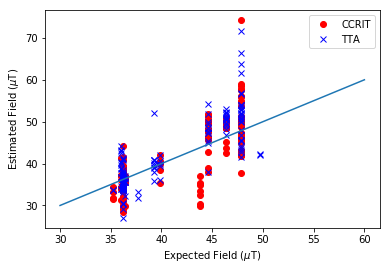

In [64]:
plt.plot(ccrit_merged.B_exp,ccrit_merged.specimen_int_uT,'ro',label='CCRIT')
plt.plot(tta_merged.B_exp,tta_merged.specimen_int_uT,'bx',label='TTA')
plt.legend()
plt.xlabel('Expected Field ($\mu$T)')
plt.ylabel('Estimated Field ($\mu$T)')
plt.plot([30,60],[30,60]);

## Problem 2

Go to the website, download and unpack the file

In [66]:
!download_magic.py -WD Problem_2 -f magic_contribution_14132.txt

Using default arguments for: -F, -A, -ID, -Fsa, -Fsi, -O, -sep
working on:  'contribution'
1  records written to file  Problem_2/contribution.txt
contribution  data put in  Problem_2/contribution.txt
working on:  'locations'
1  records written to file  Problem_2/locations.txt
locations  data put in  Problem_2/locations.txt
working on:  'sites'
2332  records written to file  Problem_2/sites.txt
sites  data put in  Problem_2/sites.txt
working on:  'samples'
2325  records written to file  Problem_2/samples.txt
samples  data put in  Problem_2/samples.txt
working on:  'specimens'
6989  records written to file  Problem_2/specimens.txt
specimens  data put in  Problem_2/specimens.txt
working on:  'measurements'
9328  records written to file  Problem_2/measurements.txt
measurements  data put in  Problem_2/measurements.txt
working on:  'ages'
2325  records written to file  Problem_2/ages.txt
ages  data put in  Problem_2/ages.txt


Read in the _measurements.txt_ file and get  a unique list of method codes:

In [71]:
meas=pd.read_csv('Problem_2/measurements.txt',sep='\t',header=1)
methods=meas.method_codes.unique()
methods

array(['LT-AF-Z', 'LT-AF-I', 'LT-IRM', 'LP-X'], dtype=object)

Looking at the MagIC Method Codes website, these are:
- AF demagnetization step
- ARM acquisition step
- IRM acquisition step
- magnetic susceptibility measurement 

So we can get the ARM, IRM and susceptibility data out like this: 

In [83]:
ARMs=meas[meas.method_codes.str.contains('LT-AF-I')]
ARMs=ARMs.dropna(subset=['magn_mass'])
IRMs=meas[meas.method_codes.str.contains('LT-IRM')]
IRMs=IRMs.dropna(subset=['magn_mass'])
RMRMs=pd.merge(ARMs,IRMs, on='specimen')
#RMRMs=pd.merge(RMRMs,chis, on='specimen')
RMRMs.columns

Index(['citations_x', 'dir_dec_x', 'dir_inc_x', 'experiment_x', 'magn_mass_x',
       'meas_temp_x', 'measurement_x', 'method_codes_x', 'quality_x',
       'specimen', 'standard_x', 'susc_chi_mass_x', 'treat_ac_field_x',
       'treat_dc_field_x', 'treat_temp_x', 'citations_y', 'dir_dec_y',
       'dir_inc_y', 'experiment_y', 'magn_mass_y', 'meas_temp_y',
       'measurement_y', 'method_codes_y', 'quality_y', 'standard_y',
       'susc_chi_mass_y', 'treat_ac_field_y', 'treat_dc_field_y',
       'treat_temp_y'],
      dtype='object')

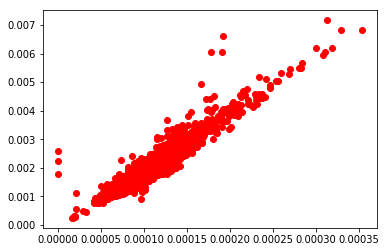

In [85]:
plt.plot(RMRMs.magn_mass_x,RMRMs.magn_mass_y,'ro');

In [123]:
specimens=pd.read_csv('Problem_2/specimens.txt',sep='\t',header=1)
specimens=specimens[specimens.citations.str.contains('Yamazaki')]
sites=pd.read_csv('Problem_2/sites.txt',sep='\t',header=1)
RPI_IRM['site']=RPI_IRM['specimen']
RPI=pd.merge(RPI_IRM,sites,on='site')
RPI.columns

Index(['analysts', 'citations_x', 'description', 'dir_dec', 'dir_inc',
       'dir_nrm_origin', 'dir_polarity', 'dir_tilt_correction',
       'geologic_classes_x', 'geologic_types_x', 'int_corr', 'int_rel',
       'lithologies_x', 'method_codes', 'result_quality', 'result_type',
       'sample', 'scientists', 'specimen', 'specimen_alternatives', 'volume',
       'weight', 'site', 'age', 'age_unit', 'citations_y', 'core_depth',
       'geologic_classes_y', 'geologic_types_y', 'lithologies_y', 'location'],
      dtype='object')

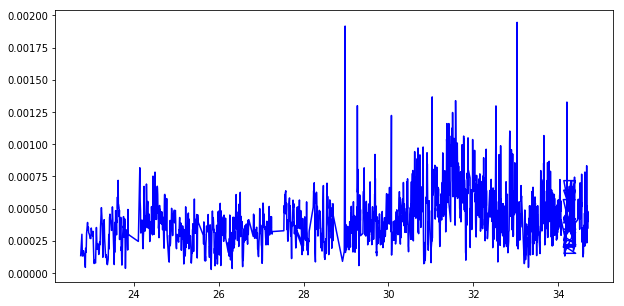

In [125]:
plt.figure(1,(10,5))
plt.plot(RPI.age,RPI.int_rel,'b-');

The minimal criteria would be a linear relationship between IRM and ARM and a range in concentrations that does not exceed 10.  These data pass these minimal criteria.  But it would be nice to replicate the data somewhere else too.  And Yamazaki has done this recently....  